# Unraveling the Challenges of Unemploymeny in Africa: A Data-Driven Approach

## General Overview

Unemployment continues to be a significant challenge for African countries. This complex issue is influenced by various socio-economic, educational, and policy-related factors. This case study aimed at exploring different datasets geared towards discovering insights and strategies that may help address the unemployment crisis in Africa.

## Objective


The main objective of this case study is to analyze data and identify patterns associated with the complex nature of unemployment in Africa, as well as to pinpoint the key factors driving high unemployment rates. Following this analysis, the study will offer informed, data-driven recommendations for governments and stakeholders to implement strategies that effectively tackle and reduce unemployment rates in Africa.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [9]:
# Importing the dataset

# 1. Unemployment: provides a comparative view of unemployment rates between genders.
unemployment = pd.read_csv("/Users/Oriscsson/Desktop/Unemployment_Africa/1. unemployment-rate-men-vs-women.csv")

# 2. National Strategy for Youth Employment: outlines various national strategies adopted across different countries to combat youth unemployment. 
strategy = pd.read_csv ("/Users/Oriscsson/Desktop/Unemployment_Africa/2. national-strategy-for-youth-employment.csv")

# 3. Share of Education in Government Expenditure: sheds light on how much governments are investing in education.
education = pd.read_csv("/Users/Oriscsson/Desktop/Unemployment_Africa/3. share-of-education-in-government-expenditure.csv")

# 4. Population with Access to Electricity: provides insights into the availability of electricity across different regions.
electricity = pd.read_csv("/Users/Oriscsson/Desktop/Unemployment_Africa/4. share-of-the-population-with-access-to-electricity.csv")

# 5. Total Firms (Historical Data): includes historical data on the number of firms (health of a country's private sector).
firms = pd.read_excel("/Users/Oriscsson/Desktop/Unemployment_Africa/5. Total_firms_Historical_data.xlsx")

# 6. country codes: This dataset is essential for mapping data points to  countries, enabling a more precise and geographically contextual analysis.
country = pd.read_csv("/Users/Oriscsson/Desktop/Unemployment_Africa/6. Country Codes.csv")

## Data cleaning and transformation

### 1. Unemployment

In [13]:
# Exploring the unemployment table to check for missing values, ...etc

print(unemployment.shape) #the number of rows and columns in the dataset

unemployment.info() #columns with data type, and null/non-null values in each column

(58578, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58578 entries, 0 to 58577
Data columns (total 7 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Entity                                                                 58578 non-null  object 
 1   Code                                                                   55049 non-null  object 
 2   Year                                                                   58578 non-null  int64  
 3   Unemployment, female (% of female labor force) (modeled ILO estimate)  6231 non-null   float64
 4   Unemployment, male (% of male labor force) (modeled ILO estimate)      6231 non-null   float64
 5   Population (historical estimates)                                      58252 non-null  float64
 6   Continent                                                              285 n

In [14]:
# rename columns
unemployment.columns=['country', 'iso_code_3', 'year','female','male',"population",'continent']

# removing null values from Females and Males columns
unemployment = unemployment.dropna(subset = ['female', 'male'])

print(unemployment.shape)
unemployment.info()

(6231, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 6231 entries, 1 to 58349
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     6231 non-null   object 
 1   iso_code_3  5828 non-null   object 
 2   year        6231 non-null   int64  
 3   female      6231 non-null   float64
 4   male        6231 non-null   float64
 5   population  5952 non-null   float64
 6   continent   187 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 389.4+ KB


In [15]:
unemployment.head(5)

,country,iso_code_3,year,female,male,population,continent
1,Afghanistan,AFG,1991,13.615,10.089,10745168.0,NaN
2,Afghanistan,AFG,1992,13.816,10.258,12057436.0,NaN
3,Afghanistan,AFG,1993,13.712,10.165,14003764.0,NaN
4,Afghanistan,AFG,1994,13.722,10.170,15455560.0,NaN
5,Afghanistan,AFG,1995,14.235,10.610,16418911.0,NaN


In [16]:
unemployment.dropna(subset=["iso_code_3"], inplace=True) 
# the iso_code_3 is important in joining this dataset to "country" table, thus null values were removed in this column.

In [17]:
unemployment = unemployment.drop ("continent", axis =1)
# the country table has the continent appropriately included. This column is not required in the unemployment table.

In [19]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5828 entries, 1 to 58349
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5828 non-null   object 
 1   iso_code_3  5828 non-null   object 
 2   year        5828 non-null   int64  
 3   female      5828 non-null   float64
 4   male        5828 non-null   float64
 5   population  5797 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 318.7+ KB


### 2. Strategy

In [29]:
print(strategy.shape) # number of rows and columns

strategy.head()

(363, 4)


,Entity,Code,Year,"8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP"
0,Afghanistan,AFG,2019,1
1,Afghanistan,AFG,2020,1
2,Argentina,ARG,2019,0
3,Argentina,ARG,2020,0
4,Argentina,ARG,2021,3


In [31]:
# Rename columns
strategy.columns =["country", "iso_code_3", "year", "national_strategy"]

# The meaning of national strategy numeric values
strategy_meaning = {0: "Not developed", 1: "Developing", 2: "Developed and adopted", 3: "Operationalised"}

#creating an additional column to show the national strategy progress
strategy.loc[:, "national_strategy_meaning"] = strategy.national_strategy.apply (lambda x: strategy_meaning[x])

In [33]:
strategy.head()

,country,iso_code_3,year,national_strategy,national_strategy_meaning
0,Afghanistan,AFG,2019,1,Developing
1,Afghanistan,AFG,2020,1,Developing
2,Argentina,ARG,2019,0,Not developed
3,Argentina,ARG,2020,0,Not developed
4,Argentina,ARG,2021,3,Operationalised


In [35]:
strategy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   country                    363 non-null    object
 1   iso_code_3                 363 non-null    object
 2   year                       363 non-null    int64 
 3   national_strategy          363 non-null    int64 
 4   national_strategy_meaning  363 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.3+ KB


### 3. Education

In [39]:
education.head()

,Entity,Code,Year,"Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,AFG,2005,15.08
1,Afghanistan,AFG,2006,12.88
2,Afghanistan,AFG,2007,12.36
3,Afghanistan,AFG,2008,16.65
4,Afghanistan,AFG,2009,17.31


In [40]:
# Rename columns
education.columns=["country", "iso_code_3", "year","education_expenditure"]

print(education.shape) # number of rows and columns
education.info()

(4104, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                4104 non-null   object 
 1   iso_code_3             3818 non-null   object 
 2   year                   4104 non-null   int64  
 3   education_expenditure  4104 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ KB


In [43]:
# removing null values from iso_code_3 column
education.dropna (subset = ["iso_code_3"], inplace = True)

In [45]:
print(education.shape) # number of rows and columns
education.info()

(3818, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 0 to 4103
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                3818 non-null   object 
 1   iso_code_3             3818 non-null   object 
 2   year                   3818 non-null   int64  
 3   education_expenditure  3818 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 149.1+ KB


### 4. Electricity

In [49]:
electricity.head()

,Entity,Code,Year,Access to electricity (% of population)
0,Afghanistan,AFG,2000,1.613591
1,Afghanistan,AFG,2001,4.074574
2,Afghanistan,AFG,2002,9.409158
3,Afghanistan,AFG,2003,14.738506
4,Afghanistan,AFG,2004,20.064968


In [51]:
print(electricity.shape) # number of rows and columns
electricity.info()

(6233, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6233 non-null   object 
 1   Code                                     5894 non-null   object 
 2   Year                                     6233 non-null   int64  
 3   Access to electricity (% of population)  6233 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 194.9+ KB


In [53]:
# Renaming columns
electricity.columns = ["country", "iso_code_3", "year", "electricity_access"]

# Dropping null rows from the iso_code_3 dataset
electricity.dropna (subset = ["iso_code_3"], inplace = True)

In [55]:
print(electricity.shape) # number of rows and columns
electricity.info()

(5894, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 5894 entries, 0 to 6232
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             5894 non-null   object 
 1   iso_code_3          5894 non-null   object 
 2   year                5894 non-null   int64  
 3   electricity_access  5894 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 230.2+ KB


### 5. Firms

In [59]:
firms.head()

,Economy,Adult population,Year,TOTAL Number of \nLimited Liability Companies,Total business density rate
0,Afghanistan,14039528.0,2009.0,4289.0,0.305495
1,Afghanistan,14444996.0,2010.0,9048.0,0.626376
2,Afghanistan,15041824.0,2011.0,12793.0,0.850495
3,Afghanistan,15743958.0,2012.0,16350.0,1.038494
4,Afghanistan,16519812.0,2013.0,19541.0,1.182883


In [61]:
#Renaming columns
firms.columns = ["country", "population", "year", "LLCs", "business_density_rate"]

print(firms.shape) # number of rows and columns

firms.info()

(1526, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1525 non-null   object 
 1   population             1522 non-null   float64
 2   year                   1522 non-null   float64
 3   LLCs                   1522 non-null   float64
 4   business_density_rate  1522 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.7+ KB


In [63]:
# Dropping null rows from population column
firms.dropna(subset = ["population"], inplace = True)

In [65]:
# Removing leading and trailing whitespaces in this column to ensure the country names fit perfectly with country dataset, as no iso_code_3 column
firms.country= firms.country.str.strip()

In [67]:
# Remove stars (asterisks) from countries with two or three stars
firms['country'] = firms['country'].str.replace(r'\*{2,3}$', '', regex=True)

# Remove the star in the original "Country" column
firms['country'] = firms['country'].str.replace(r'\*$', '', regex=True)

# Renaming countries in firms table, so they align with country table
firms["country"] = firms["country"].replace({
                                            "Congo, Dem. Rep.": "Congo, DR", "Czech Republic": "Czechia", "Egypt, Arab Rep.": "Egypt", 
                                            "Iran, Islamic Rep.": "Iran", "Korea, Rep.": "South Korea", "Kyrgyz Republic": "Kyrgyzstan",
                                            "Netherlands Antilles": "Netherlands", "Russian Federation": "Russia", 
                                            "Slovak Republic": "Slovakia", "Hong Kong SAR, China" : "Hong Kong", "Taiwan, China" : "Taiwan"
                                            })

### 6. Country

In [71]:
country.head()

,name,alpha-2,alpha-3,country-code,region,sub-region
0,Afghanistan,AF,AFG,4,Asia,Southern Asia
1,Åland Islands,AX,ALA,248,Europe,Northern Europe
2,Albania,AL,ALB,8,Europe,Southern Europe
3,Algeria,DZ,DZA,12,Africa,Northern Africa
4,American Samoa,AS,ASM,16,Oceania,Polynesia


In [72]:
# Renaming columns
country.columns = ["country", "iso_code_2", "iso_code_3", "country_code", "region", "sub_region"]

print(firms.shape) # number of rows and columns 

country.info()

(1522, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       249 non-null    object
 1   iso_code_2    248 non-null    object
 2   iso_code_3    249 non-null    object
 3   country_code  249 non-null    int64 
 4   region        248 non-null    object
 5   sub_region    248 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.8+ KB


In [75]:
# to see the rows with missing value
country.loc[country.isnull().any(axis=1)]

,country,iso_code_2,iso_code_3,country_code,region,sub_region
8,Antarctica,AQ,ATA,10,NaN,NaN
153,Namibia,NaN,NAM,516,Africa,Sub-Saharan Africa


In [76]:
# Temporarily set max_rows to None to display all rows
pd.options.display.max_rows = None

# viewing the countries to see if they are correctly spelt
country.country.value_counts().sort_index()

# Resetting to the default
pd.reset_option('display.max_rows')

In [79]:
# Dropping the iso_code_2 column, as it is not required
country = country.drop("iso_code_2", axis =1)

# Dropping the country_code column, as it is not required
country = country.drop("country_code", axis =1)

In [81]:
# Treating the null value in region and sub-region of Antarctica
country["region"] = country["region"].fillna("Antarctica")
country["sub_region"] = country["sub_region"].fillna("Antarctica")

In [83]:
# Renaming several countries.
country["country"]= country["country"].replace({
                                                "Bolivia (Plurinational State of)": "Bolivia", "Iran (Islamic Republic of)" : "Iran",
                                                "Korea (Democratic People's Republic of)": "North Korea", "Korea, Republic of": "South Korea",
                                                 "Taiwan, Province of China": "Taiwan", 
                                                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                                " (Bolivarian Republic of": "", "Viet Nam ": "Vietnam", "Russian Federation": "Russia",
                                                "Tanzania, United Republic of": "Tanzania", "Congo, Democratic Republic of the": "Congo, DR"
                                                })

### Checking the PF-FK relationship between tables

In [87]:
# Merge unemployment, strategy, education and electricity tables with country using iso_code_3
# Merge firms with country using country names

In [89]:
column_to_check = 'iso_code_3'

# Get values in unemployment's column that are not present in countries's column
values_not_in_unemployment = unemployment[~unemployment[column_to_check].isin(country[column_to_check])][column_to_check]

values_not_in_unemployment.unique()

array(['OWID_CIS', 'OWID_WRL'], dtype=object)

In [91]:
filter = unemployment.iso_code_3.str.contains("OWID")
unemployment = unemployment[~filter]

# checking if country and unemployment dataset aligns after removing values containing "OWID" from iso_code_3 in unemployment table.
values_not_in_unemployment_2 = unemployment[~unemployment[column_to_check].isin(country[column_to_check])][column_to_check]
values_not_in_unemployment_2.unique()

array([], dtype=object)

In [93]:
# Get values in strategy's column that are not present in country's column
values_not_in_strategy = strategy[~strategy[column_to_check].isin(country[column_to_check])][column_to_check]

values_not_in_strategy.unique()

array([], dtype=object)

In [95]:
# Get values in education's column that are not present in country's column
values_not_in_education = education[~education[column_to_check].isin(country[column_to_check])][column_to_check]

# If the code above return values, it was cleaned in the appropriate tables as above.
values_not_in_education.unique()

array(['OWID_WRL'], dtype=object)

In [97]:
filter_2 = education.iso_code_3.str.contains("OWID")
education = education[~filter_2]

values_not_in_education_2 = education[~education[column_to_check].isin(country[column_to_check])][column_to_check]
values_not_in_education_2.unique()

array([], dtype=object)

In [99]:
# Get values in electricity's column that are not present in country's column
values_not_in_electricity = electricity[~electricity[column_to_check].isin(country[column_to_check])][column_to_check]

# If the code above return values, it was cleaned in the appropriate tables as above.
values_not_in_electricity.unique()

array(['OWID_CIS', 'OWID_KOS', 'OWID_WRL'], dtype=object)

In [101]:
filter_3 = electricity.iso_code_3.str.contains("OWID")
electricity = electricity[~filter_3]

values_not_in_electricity_2 = electricity[~electricity[column_to_check].isin(country[column_to_check])][column_to_check]
values_not_in_electricity_2.unique()

array([], dtype=object)

In [104]:
# Column to check
column_to_check2 = 'country'

# Get values in firms's column that are not present in country's column
values_not_in_firms= firms[~firms[column_to_check2].isin(country[column_to_check2])][column_to_check2]

values_not_in_firms.unique()

array(['Kosovo'], dtype=object)

In [106]:
#the block of codes to check for values in both dataset can also be written as below:

# Convert both columns to sets and find the difference
method2 = set(firms[column_to_check2]) - set(country[column_to_check2])

## Merging country dataset (containing region and sub-region) to other datasets

In [110]:
#Merging the country dataset to the others, so the region and sub-regions of each country is added to the tables

In [112]:
# unemployment table
unemployment_copy = unemployment.merge(country, on="iso_code_3", how='outer') 
#other join is used to return all the unique country codes in both dataset
unemployment_copy = unemployment_copy.drop("country_y", axis=1) # Drop repeated country names
unemployment_copy.rename(columns = {"country_x": "country"}, inplace = True) # Rename country column to appropriate header

# strategy table
strategy_copy = strategy.merge(country, on= "iso_code_3")
strategy_copy = strategy_copy .drop("country_y", axis=1) # Drop repeated country names
strategy_copy.rename(columns = {"country_x": "country"}, inplace = True) # Rename country column to appropriate header

# education table
education_copy = education.merge(country, on= "iso_code_3")
education_copy = education_copy .drop("country_y", axis=1) # Drop repeated country names
education_copy.rename(columns = {"country_x": "country"}, inplace = True) # Rename country column to appropriate header

# electricity table
electricity_copy = electricity.merge(country, on="iso_code_3")
electricity_copy = electricity_copy.drop("country_y", axis=1) # Drop repeated country names
electricity_copy.rename(columns = {"country_x": "country"}, inplace = True) # Rename country column to appropriate header

# firms table
firms_copy = firms.merge(country, on="country")

## Analysis and Visualisation

In [116]:
# Data in each dataset was only considered from 2000 up till the latest date.

unemployment_copy = unemployment_copy[unemployment_copy.year.between (2000, 2022)]
strategy_copy = strategy_copy[strategy_copy.year.between (2000, 2022)]
education_copy = education_copy[education_copy.year.between (2000, 2022)]
electricity_copy= electricity_copy[electricity_copy.year.between (2000, 2022)]
firms_copy = firms_copy[firms_copy.year.between (2000, 2022)]

### Regional Analysis

To see unemployment rates in the world, and the  factors affecting it.

#### Country count in each region

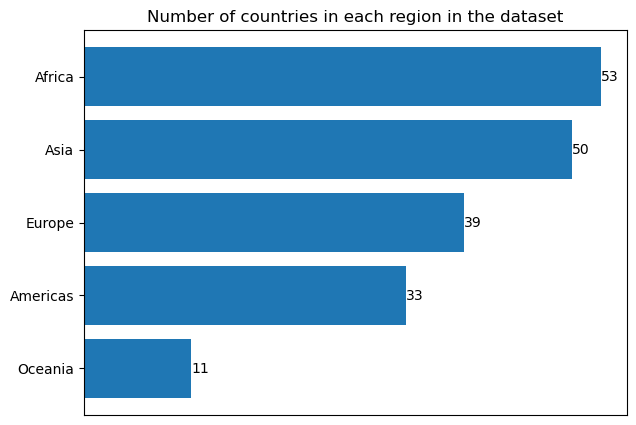

In [122]:
# Number of countries in each region in the dataset
region_country_count = unemployment_copy.groupby("region")['country'].nunique().sort_values(ascending = True)
region_country_count = region_country_count[region_country_count >0 ]

# Adding data labels
fig,ax = plt.subplots(figsize =(7,5))
bars = ax.barh(region_country_count.index, region_country_count)
ax.bar_label(bars, labels=[value for value in region_country_count]) #To show the data labels on the bars
ax.set_xticks(ticks=[])
ax.set_title('Number of countries in each region in the dataset')
plt.show()

Having an idea of the number of countries in each region in the dataset gives an idea on the validity of the data. Each region was adequately accounted for in the unemployment table.

### Average, female and male unemployment rates in the various regions/continents of the world. 

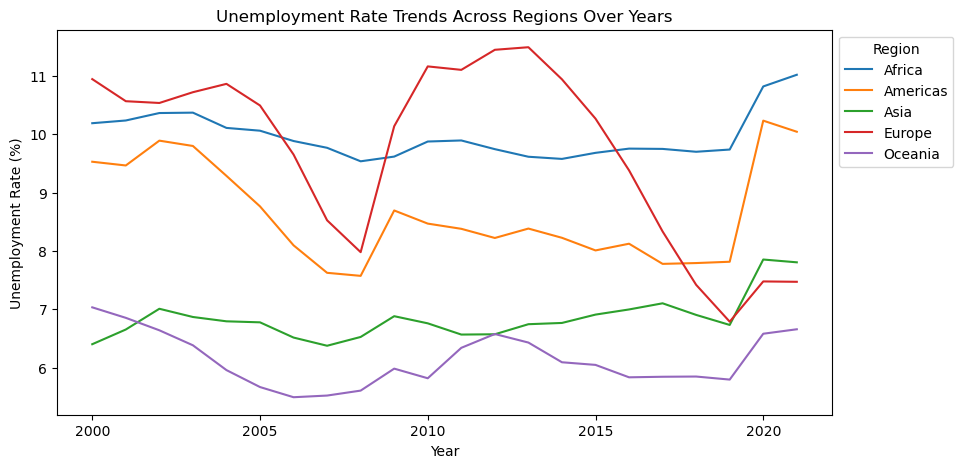

In [132]:
# Determining average unemployment rates in the regions

# Creating a new column to show the average unemployment rate for country in each year.
unemployment_copy.loc[:, 'average_unemployment'] = unemployment_copy[['female', 'male']].mean(axis=1)

# Grouping the regions by year to calculate the mean unemployment rate for each region per year
region_year_data = unemployment_copy.groupby(['region', 'year']).mean(numeric_only= True).reset_index()

# Line plot for unemployment rates across years.
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['average_unemployment'], label=region) for region, value in region_year_data.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Trends Across Regions Over Years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.savefig('Regional unemployment rates')
plt.show()

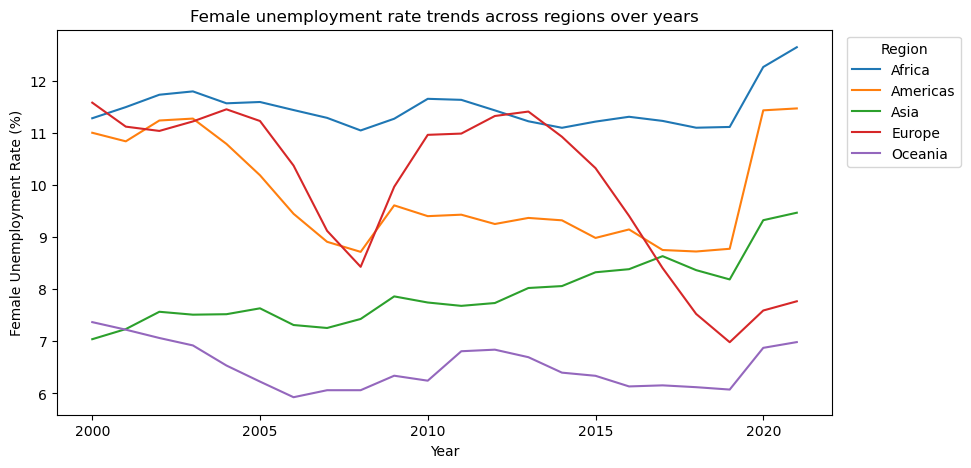

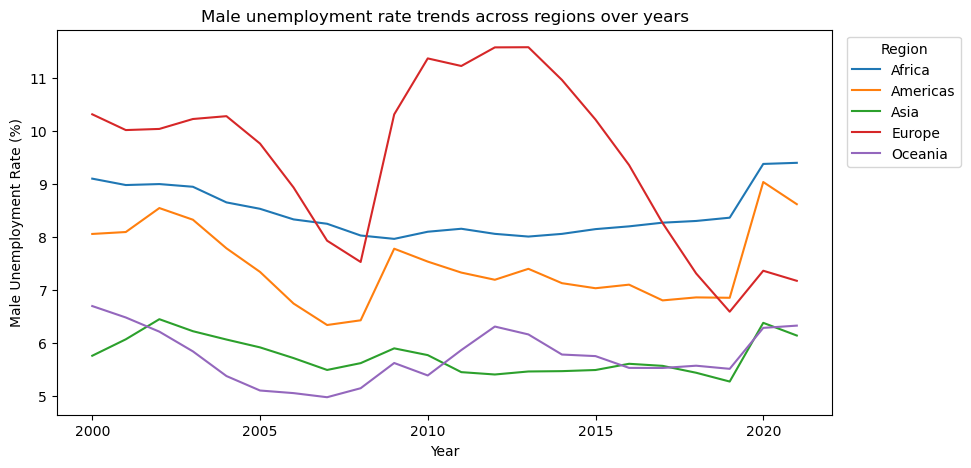

In [134]:
# Determining female unemployment rates in the regions
region_year_data_female = unemployment_copy.groupby(['region', 'year'])['female'].mean().reset_index()

# Line plot for female unemployment rates across years for each region
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['female'], label=region) for region, value in region_year_data_female.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Female Unemployment Rate (%)')
plt.title('Female unemployment rate trends across regions over years')
plt.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(False);



# Determining male unemployment rates in the regions
region_year_data_male = unemployment_copy.groupby(['region', 'year'])['male'].mean().reset_index()

# Line plot for male unemployment rates across years for each region
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['male'], label=region) for region, value in region_year_data_male.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Male Unemployment Rate (%)')
plt.title('Male unemployment rate trends across regions over years')
plt.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(False);

Africa currently has the highest unemployment rate among all regions, with the Americas (North and South combined) in second place, showing a sharp increase in recent years since 2019. Oceania has the lowest unemployment rate since the 2000s, closely followed by Europe.

When examining unemployment by gender, the female unemployment rate is higher than that of males in each region, with particularly significant disparities observed in Africa, the Americas, and Asia.

#### Education

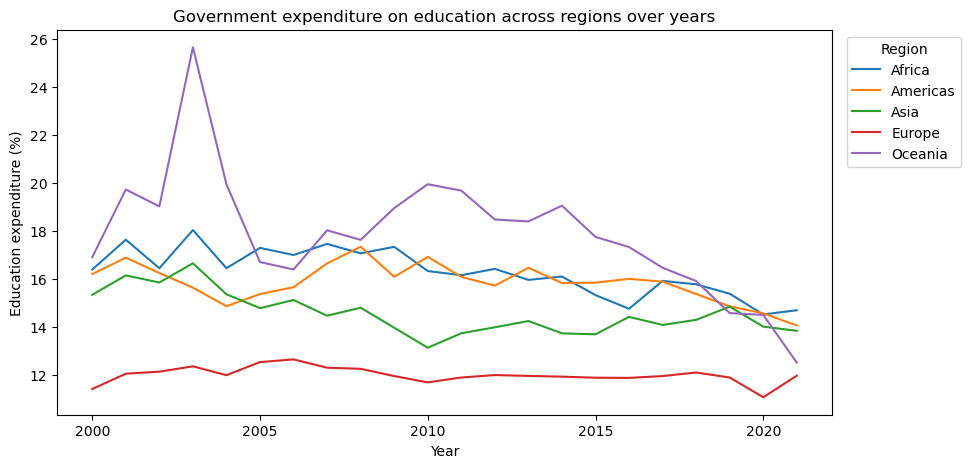

In [139]:
# Determining government expenditure on education, total (% of government expenditure) in the regions

# Group by 'region' and 'year' to calculate the % of government expenditure on education for each region per year
region_year_education = education_copy.groupby(['region', 'year']).mean(numeric_only=True).reset_index()

# Line plot for government expenditure on education across years for each region.
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['education_expenditure'], label=region) for region, value in region_year_education.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Education expenditure (%)')
plt.title('Government expenditure on education across regions over years')
plt.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

Over the years, there was a slight decline in the government's expenditure on education in each region. Oceania experienced a noticeable increase followed by a decrease between 2002 and 2004 and again from 2008 to 2013. Europe consistently had the lowest education expenditure of all regions since 2000.

#### Electricity

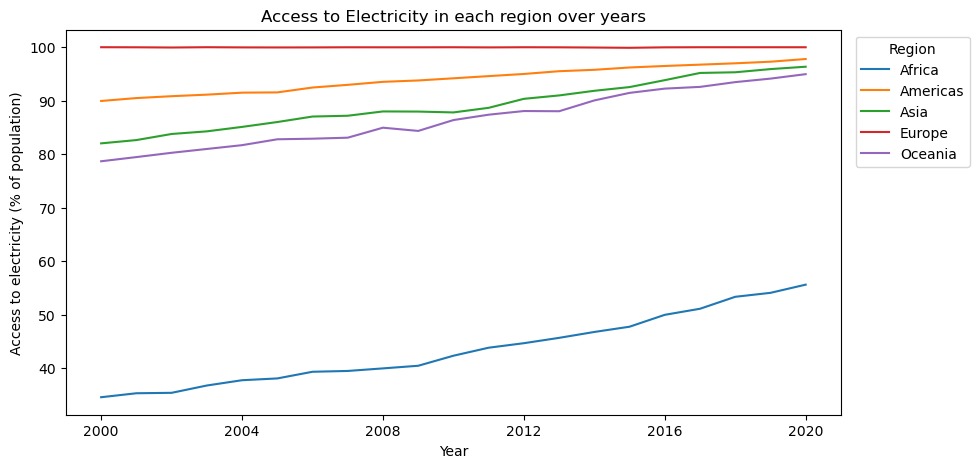

In [144]:
# Determining access to electricity in the regions

# Group by 'region' and 'year' to calculate the access to electricity (% of population) for each region per year
region_year_electricity = electricity_copy.groupby(['region', 'year']).mean(numeric_only=True).reset_index()

# Convert 'year' to datetime format to remove the decimal in x-axis
region_year_electricity['year'] = pd.to_datetime(region_year_electricity['year'], format='%Y')

# Line plot for electricity access across years for each region.
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['electricity_access'], label=region) for region, value in region_year_electricity.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Access to electricity (% of population)')
plt.title('Access to Electricity in each region over years')
plt.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left');

Aside from Europe, which has maintained nearly 100% access to electricity since 2000, other regions have shown a steady increase in electricity access up until the most recent year of the data. According to the available data, African countries reported the lowest access to electricity compared to other regions.

#### Firms

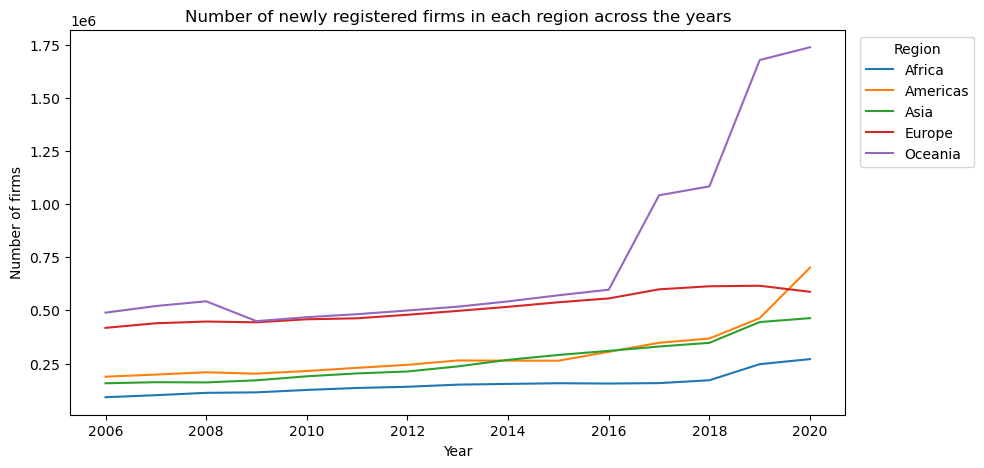

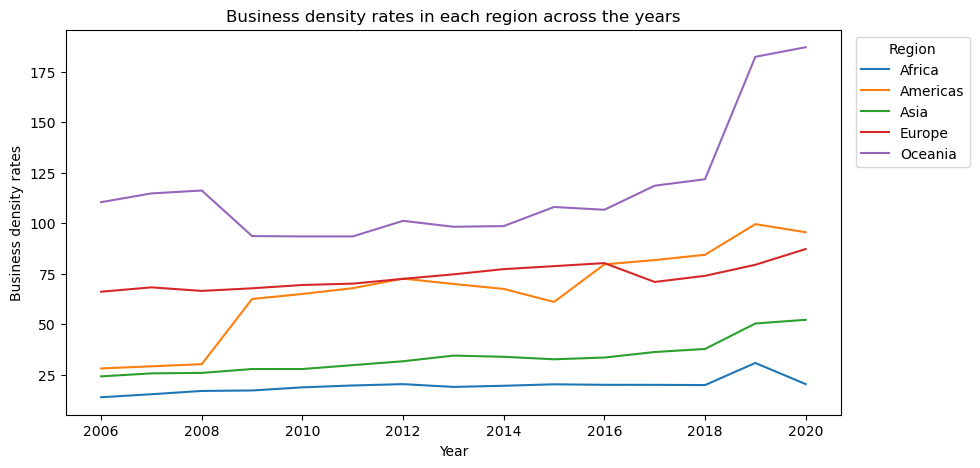

In [149]:
# Determining the health of a country's private sector in the regions

# LLCs (number of new registered firms)
# Group by 'region' and 'year' to calculate the LLCs for each region per year
region_year_LLCs = firms_copy.groupby(['region', 'year']).mean(numeric_only=True).reset_index()


# Line plot for LLCs across years for each region.
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['LLCs'], label=region) for region, value in region_year_LLCs.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of firms')
plt.title('Number of newly registered firms in each region across the years')
plt.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left');



# Total business density rate in the regions

# Group by 'region' and 'year' to calculate the business density rate for each region per year
region_year_bus_rates = firms_copy.groupby(['region', 'year']).mean(numeric_only=True).reset_index()

# Line plot for business densitry rates across years for each region.
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['business_density_rate'], label=region) for region, value in region_year_bus_rates.groupby('region')]


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Business density rates')
plt.title('Business density rates in each region across the years')
plt.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left');

LLCs refer to the number of new limited liability companies registered in a specific economy during a given year, serving as an indicator of entrepreneurial activity and business creation. The business density rate measures the number of registered firms per 1,000 working-age individuals (ages 15–64), focusing on private, formal sector companies with limited liability. Each region experienced steady growth since 2000, with two notable exceptions: Oceania saw an exponential increase in LLCs and business density rates in 2016 and 2018, respectively, while Africa exhibited a nearly static business density growth rate over the years. 

When ranked by these indices, the regions are ordered from highest to lowest as follows: Oceania, Europe, the Americas, Asia, and finally, Africa.

>   **INSIGHTS**

The regional analyses offered a comprehensive overview of unemployment across different regions, with Africa exhibiting the highest average unemployment rates, including among both female and male workers. In contrast, Oceania had the lowest unemployment rates. However, it is important to examine Europe more closely, as it previously recorded the highest unemployment rate from 2009 to 2014 before experiencing a significant decline.

Africa also ranked the lowest in terms of access to electricity, government expenditure on education, LLC registrations, and business density rates. These factors collectively contribute to the region's notably high average unemployment rates.

Conducting subsequent correlation studies on these variables could provide further insights. Additionally, using Europe as a benchmark could be beneficial in understanding and addressing unemployment challenges in Africa.

### Regional Correlation studies

In [155]:
# List of DataFrames to merge for correlation studies between numeric columns
dataframes = [
    unemployment_copy,
    education_copy,
    electricity_copy,
    strategy_copy,
    firms_copy
            ]

# Initialize merged_df with the first DataFrame
re_merged_df = dataframes[0]

# Merging the other dataframes
for df in dataframes[1:]:
    re_merged_df = pd.merge(re_merged_df, df, on=['iso_code_3', 'year'], how='left', suffixes=('', '_dup'))

# Drop unwanted columns
re_merged_df = re_merged_df.drop(columns=['region_dup', 'country_dup', 'sub_region_dup'], errors='ignore')

# Renaming columns
re_merged_df = re_merged_df.rename(columns={'country_x': 'country', 'region_x': 'region', 'sub_region_x': 'sub_region'})


In [157]:
re_merged_df.dropna (subset = ["country"], inplace = True)
# this was done to drop countries in the dataset from the country table that don't appear in any other merged table.

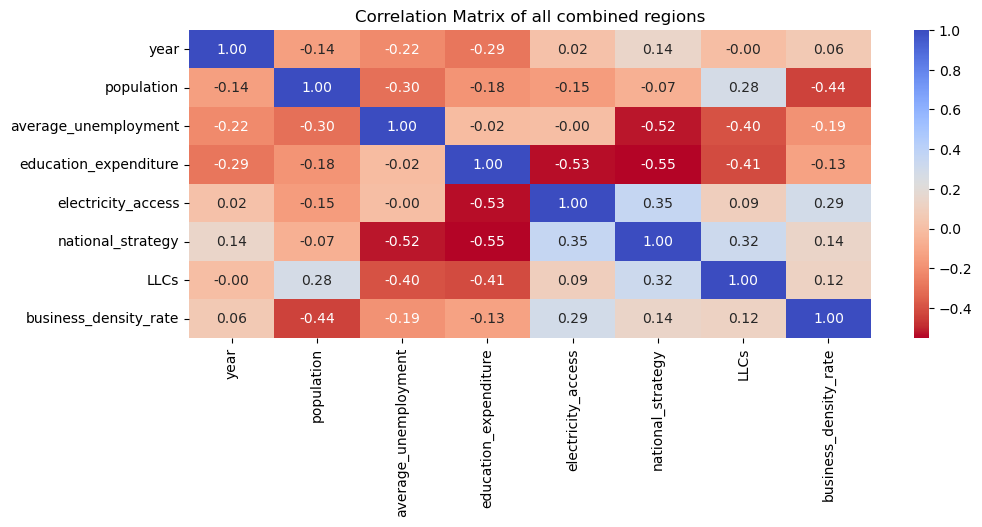

In [159]:
# Calculate the correlation matrix
correlation_matrix = re_merged_df[["year",'population', "average_unemployment", "education_expenditure", "electricity_access", 
                                    "national_strategy", "LLCs", 'business_density_rate']].corr()
#Correlation matrix plot
plt.figure(figsize=(11, 4))
sns.heatmap(correlation_matrix.corr(numeric_only=True), cmap="coolwarm_r", fmt='.2f', annot=True)

#Add title
plt.title('Correlation Matrix of all combined regions')
plt.show()

Analyzing the impact of various factors—such as education, access to electricity, national strategies for youth empowerment, and the number of firms present—on unemployment revealed some significant findings. 

When considering unemployment rates, the most influential factors were the national strategy for youth employment and the number of limited liability companies (LLCs). Both of these factors demonstrated a negative correlation with unemployment rates, with correlation coefficients of -0.52 and -0.40, respectively. This indicates that regions with a higher number of countries that have developed, adopted, and implemented youth employment strategies tend to experience lower unemployment rates. Additionally, an increase in the number of new limited liability companies registered in a given year is associated with a reduction in unemployment.

### Europe

Given that Europe once recorded the highest average unemployment rates but has since managed to lower them to become the region with the second-lowest unemployment rates, it served as a benchmark for further analysis. This approach aims to identify effective strategies that can be applied to reduce unemployment in Africa. By examining the policies and practices that contributed to Europe’s decline in unemployment, valuable insights can be gained to help address similar challenges in the Africa.

In [165]:
# Filtering only Europe from the dataset
merge_Europe = re_merged_df[re_merged_df.region == "Europe"]

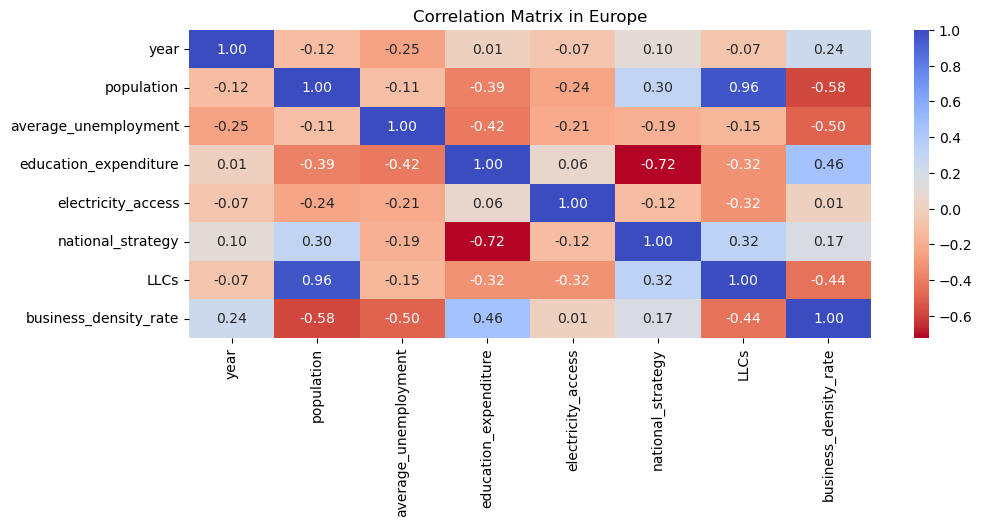

In [167]:
# Calculate the correlation matrix
correlation_matrix_eu = merge_Europe[["year", 'population', "average_unemployment", "education_expenditure", "electricity_access", 
                                    "national_strategy", "LLCs", 'business_density_rate']].corr()

# correlation plot
plt.figure(figsize=(11, 4))
sns.heatmap(correlation_matrix_eu.corr(numeric_only=True), cmap="coolwarm_r", fmt='.2f', annot=True)
plt.title('Correlation Matrix in Europe')
plt.show()

**INSIGHTS**

Average unemployment reduced in Europe over the years. Given the negative correlations between unemployment and factors such as education expenditure, access to electricity, national strategies for youth employment, and the number of businesses, it can be inferred that increases in these areas collectively contributed to reducing unemployment rates. Among these factors, the business density rate had the most significant impact on unemployment. A deeper exploration of the relationship between each factor and unemployment is recommended, as it is likely to yield additional insights.

#### Scatter plots to show the relationship between unemployment and these factors in detail in Europe

In [172]:
sc_europe = merge_Europe[['average_unemployment', 'electricity_access', 'education_expenditure', 'LLCs', 'business_density_rate']]

#### *Electricity access and unemployment*

Text(0.05, 0.95, 'r = -0.16\nr² = 0.02')

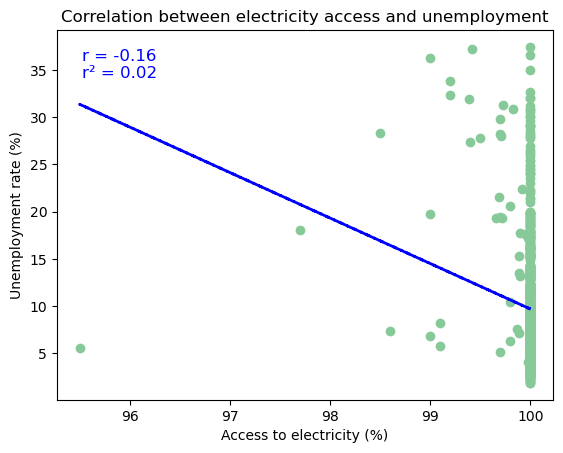

In [175]:
# Preparing the data
sc_pl1 = sc_europe.dropna(subset=['electricity_access', 'average_unemployment'])

# Scatter plot to show relationship between access to electricity and unemployment in Europe
plt.scatter(sc_pl1['electricity_access'], sc_pl1['average_unemployment'], color='#88c999')
plt.ylabel ("Unemployment rate (%)")
plt.xlabel ("Access to electricity (%)")
plt.title ("Correlation between electricity access and unemployment");

# Calculate equation for trendline
z = np.polyfit(sc_pl1['electricity_access'], sc_pl1['average_unemployment'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(sc_pl1['electricity_access'], p(sc_pl1['electricity_access']), color='blue', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(sc_pl1['electricity_access'], sc_pl1['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='blue')

Although as access to electricity increases, average unemployment slightly decrease, a correlation coefficient (r-value) of -0.12 indicates a very weak negative correlation between electricity access and unemployment. The r^2  value of 0.02 (or 2%) means that only 2% of the variance in unemployment can be explained by access to electricity, indicating that access to electricity is not a strong predictor of unemployment in this dataset and other factors are likely far more influential on unemployment in Europe. 

#### *Education expenditure and unemployment*

Text(0.05, 0.95, 'r = -0.38\nr² = 0.14')

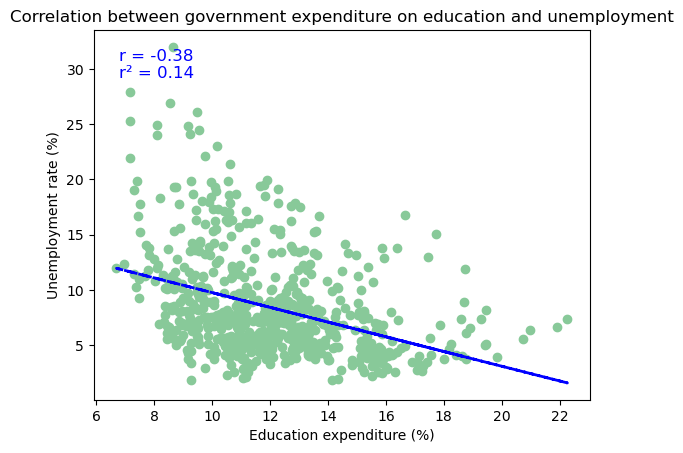

In [182]:
# Preparing the data
sc_pl2 = sc_europe.dropna(subset=['education_expenditure', 'average_unemployment'])

# Scatter plot to show relationship between access to electricity and unemployment in Europe
plt.scatter(sc_pl2['education_expenditure'], sc_pl2['average_unemployment'], color='#88c999')
plt.ylabel ("Unemployment rate (%)")
plt.xlabel ("Education expenditure (%)")
plt.title ("Correlation between government expenditure on education and unemployment");

# Calculate equation for trendline
z = np.polyfit(sc_pl2['education_expenditure'], sc_pl2['average_unemployment'], 1)
p = np.poly1d(z)

# Add trendline to plot
plt.plot(sc_pl2['education_expenditure'], p(sc_pl2['education_expenditure']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2
correlation_matrix = np.corrcoef(sc_pl2['education_expenditure'], sc_pl2['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Display r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='blue')

Increasing education expenditure decreased average unemployment in Europe, indicated by an r value of -0.38 and a 14% r2 value. Education expenditure seemed to play a bigger role in reducing unemployment in Europe compared to electricity.

#### *Firms & Business density rate and unemployment*

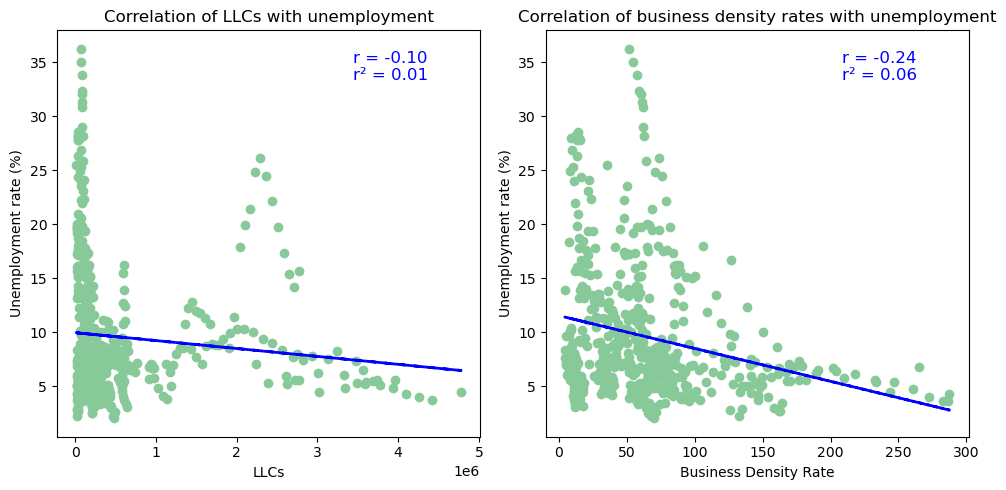

In [189]:
# Preparing data
sc_pl3 = sc_europe.dropna(subset=['LLCs', 'business_density_rate', 'average_unemployment'])

# Set up side-by-side plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First scatter plot: LLCs vs Unemployment
ax[0].scatter(sc_pl3['LLCs'], sc_pl3['average_unemployment'], color='#88c999')
ax[0].set_ylabel("Unemployment rate (%)")
ax[0].set_xlabel("LLCs")
ax[0].set_title("Correlation of LLCs with unemployment");

# Calculate trendline for first plot
z = np.polyfit(sc_pl3['LLCs'], sc_pl3['average_unemployment'], 1)
p = np.poly1d(z)
ax[0].plot(sc_pl3['LLCs'], p(sc_pl3['LLCs']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2 for first plot
correlation_matrix = np.corrcoef(sc_pl3['LLCs'], sc_pl3['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2
ax[0].text(0.7, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=ax[0].transAxes, 
           verticalalignment='top', fontsize=12, color='blue')



# Second scatter plot: Business Density Rate vs Unemployment
ax[1].scatter(sc_pl3['business_density_rate'], sc_pl3['average_unemployment'], color='#88c999')
ax[1].set_ylabel("Unemployment rate (%)")
ax[1].set_xlabel("Business Density Rate");
ax[1].set_title("Correlation of business density rates with unemployment");

# Calculate trendline for second plot
z = np.polyfit(sc_pl3['business_density_rate'], sc_pl3['average_unemployment'], 1)
p = np.poly1d(z)
ax[1].plot(sc_pl3['business_density_rate'], p(sc_pl3['business_density_rate']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2 for second plot
correlation_matrix = np.corrcoef(sc_pl3['business_density_rate'], sc_pl3['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2
ax[1].text(0.7, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=ax[1].transAxes, 
           verticalalignment='top', fontsize=12, color='blue')

# Adjust layout and show
plt.tight_layout()
plt.show()


The increase in LLCs and the business density rate contributed to a decrease in unemployment in Europe. Total business density rate, which reflects business creation and entrepreneurial activity, measures how frequently new businesses are established in a specific region or country. A higher new business density indicates a dynamic business environment with more entrepreneurs launching new ventures, which helps explain the reduction in unemployment in Europe over the years.

#### *National strategy for youth employment and unemployment*

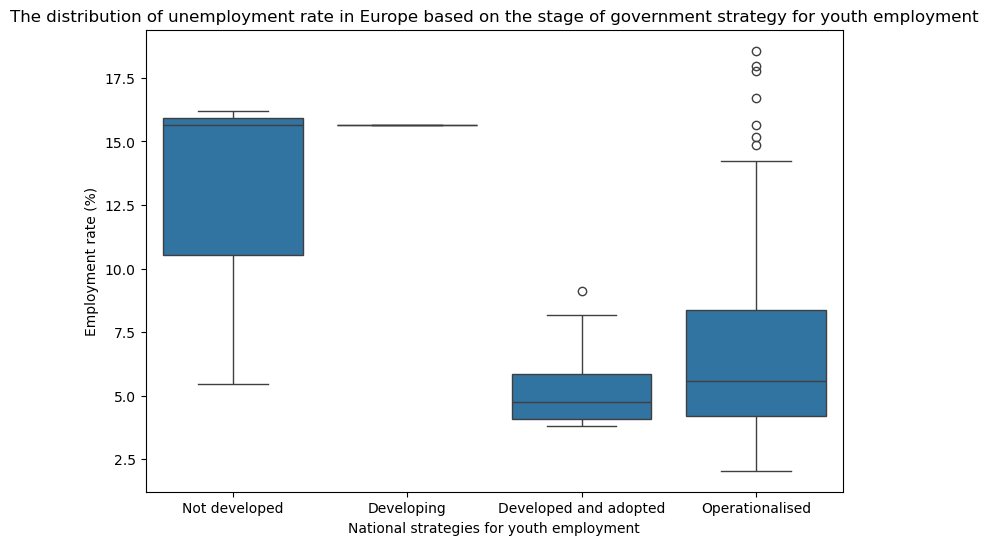

In [194]:
# Getting the data required for the box plot to show the effect of strategies on youth employment on unemloyment
box_plt_europe = merge_Europe[['average_unemployment','national_strategy_meaning','country', 'national_strategy']]
box_plt_europe = box_plt_europe.dropna(subset=['national_strategy', 'average_unemployment'])

# Box plot
plt.figure(figsize=(9, 6))
sns.boxplot(x = box_plt_europe['national_strategy_meaning'], y = box_plt_europe['average_unemployment'],
            order = ['Not developed', 'Developing', 'Developed and adopted', 'Operationalised'])
plt.xlabel("National strategies for youth employment")
plt.ylabel ("Employment rate (%)")
plt.title ("The distribution of unemployment rate in Europe based on the stage of government strategy for youth employment");

Most European countries that lack developed national strategies for youth employment reported the highest unemployment rates in the region, as illustrated in the box plot labeled "Not Developed," which shows that half of these countries had unemployment rates exceeding 15%. In contrast, countries with "Developed and Adopted" and "Operationalized" strategies for youth employment corresponded with much lower unemployment levels, exhibiting a mid-range unemployment rate of around 5%.

**INSIGHTS**

Examining the individual contributions and effects of each factor on the unemployment pattern in Europe provides valuable insights into how European countries collectively addressed unemployment over the years. The increase in each of these factors, as demonstrated in the correlation matrix and scatter plots, has led to a decrease in unemployment. Although each factor exhibited weak correlations individually, their combined influence contributed to reducing unemployment rates.

Adopting these general approaches could serve as a guideline for addressing unemployment in the African region.

### Africa

In [201]:
# Filtering only Africa from the dataset
merge_Africa = re_merged_df[re_merged_df.region == "Africa"]

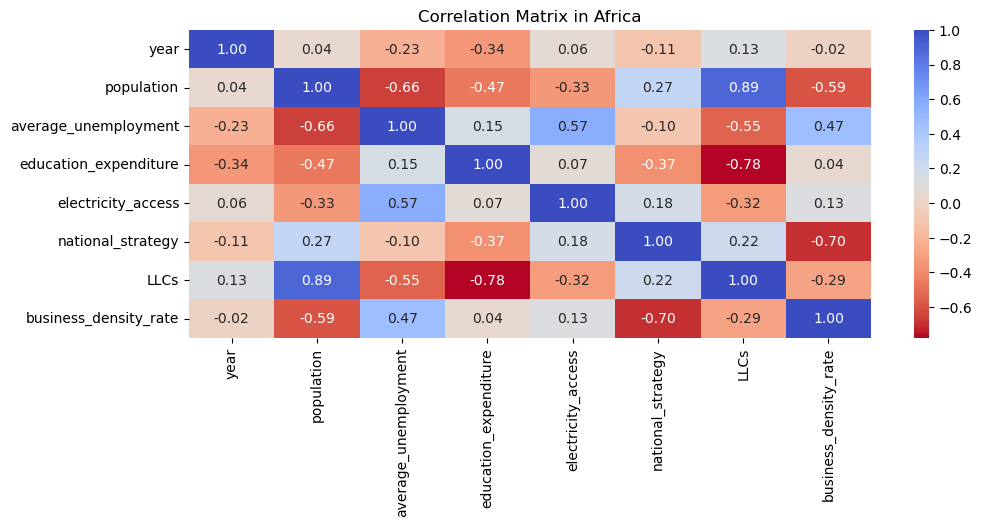

In [203]:
# Calculate the correlation matrix
correlation_matrix_au = merge_Africa[["year", "population", "average_unemployment", "education_expenditure", "electricity_access", 
                                    "national_strategy", "LLCs", 'business_density_rate']].corr()

# Correlation matrix
plt.figure(figsize=(11, 4))
sns.heatmap(correlation_matrix_au.corr(numeric_only=True), cmap="coolwarm_r", fmt='.2f', annot=True)
plt.title('Correlation Matrix in Africa')
plt.show()

**INSIGHTS**

Africa has the highest unemployment rate among all regions. The negative correlation between unemployment and the number of limited liability companies (LLCs) suggests that countries in Africa are lagging in the registration of new LLCs each year. This correlation offers a clear explanation for the high unemployment rates, as other factors—such as education expenditure, access to electricity, and new business density rates—show a positive correlation with unemployment, indicating that increases in these areas have led to higher unemployment rates. Further investigation into the relationships between each of these factors and unemployment is warranted, as it could yield additional insights.

### Scatter plots to show the relationship between unemployment and these factors in detail in Africa

In [208]:
sc_africa = merge_Africa[['average_unemployment', 'electricity_access', 'education_expenditure', 'LLCs', 'business_density_rate']]

#### *Electricity access and unemployment*

Text(0.3, 0.95, 'r = 0.44\nr² = 0.19')

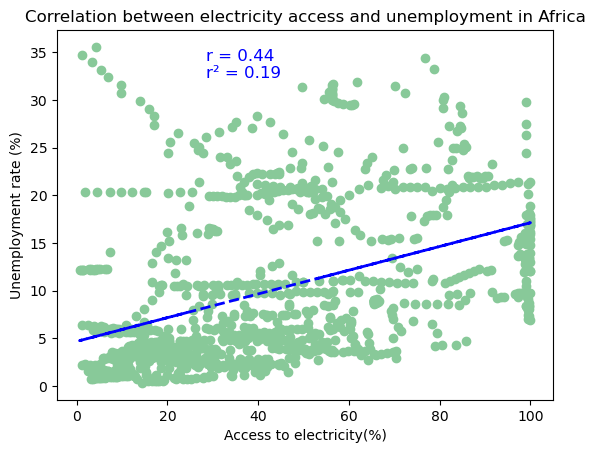

In [211]:
# Preparing the data
sc_af1= sc_africa.dropna(subset=['electricity_access', 'average_unemployment'])

# Scatter plot to show relationship between access to electricity and unemployment in Africa
plt.scatter(sc_af1['electricity_access'], sc_af1['average_unemployment'], color='#88c999')
plt.ylabel ("Unemployment rate (%)")
plt.xlabel ("Access to electricity(%)")
plt.title ("Correlation between electricity access and unemployment in Africa");

# calculate equation for trendline
z = np.polyfit(sc_af1['electricity_access'], sc_af1['average_unemployment'], 1)
p = np.poly1d(z)

# add trendline to plot
plt.plot(sc_af1['electricity_access'], p(sc_af1['electricity_access']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2
correlation_matrix = np.corrcoef(sc_af1['electricity_access'], sc_af1['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Display r and r^2 on the plot
plt.text(0.3, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='blue')

According to the available data, an increase in access to electricity in African countries is associated with rising unemployment rates. This finding is surprising, as access to electricity is typically considered a prerequisite for starting various businesses. To better understand the relationship between electricity access and unemployment, it may be necessary to evaluate the data at a country-by-country level, which could provide more nuanced insights on its relationship with unemployment.

#### *Education expenditure and unemployment*

Text(0.05, 0.95, 'r = 0.06\nr² = 0.00')

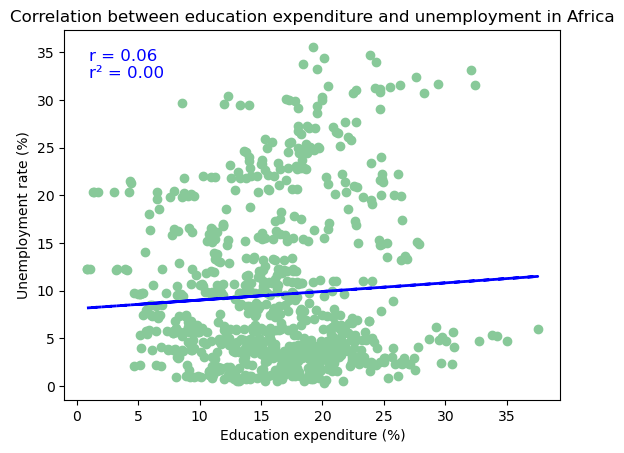

In [216]:
# Clean the data
sc_af2 = sc_africa.dropna(subset=['education_expenditure', 'average_unemployment'])

# Scatter plot to show relationship between government expenditure on education and unemployment in Africa
plt.scatter(sc_af2['education_expenditure'], sc_af2['average_unemployment'], color='#88c999')
plt.ylabel ("Unemployment rate (%)")
plt.xlabel ("Education expenditure (%)")
plt.title ("Correlation between education expenditure and unemployment in Africa");

# calculate equation for trendline
z = np.polyfit(sc_af2['education_expenditure'], sc_af2['average_unemployment'], 1)
p = np.poly1d(z)

# add trendline to plot
plt.plot(sc_af2['education_expenditure'], p(sc_af2['education_expenditure']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2
correlation_matrix = np.corrcoef(sc_af2['education_expenditure'], sc_af2['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Display r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='blue')

Education expenditure seemed to do little to nothing with tackling unemployment in African countries.  Other factors likely influence unemployment in Africa.

#### *Firms & Business density rate and unemployment*

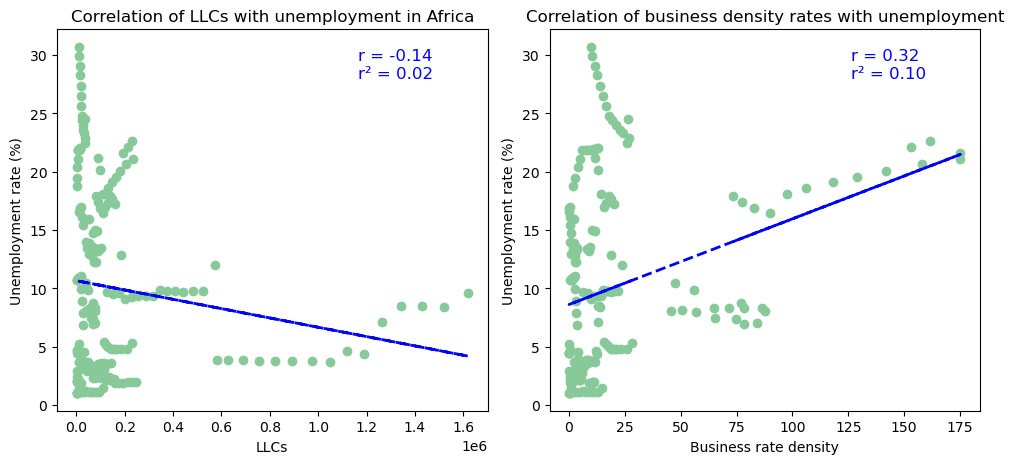

In [223]:
# Preparing the data
sc_af3 = sc_africa[['average_unemployment', 'LLCs', 'business_density_rate' ]]
sc_af3 = sc_af3.dropna(subset=['LLCs', 'average_unemployment'])


# Set up side-by-side plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First scatter plot: LLCs vs Unemployment
ax[0].scatter(sc_af3['LLCs'], sc_af3['average_unemployment'], color='#88c999')
ax[0].set_ylabel ("Unemployment rate (%)")
ax[0].set_xlabel ("LLCs")
ax[0].set_title("Correlation of LLCs with unemployment in Africa");

# Calculate trendline for first plot
z = np.polyfit(sc_af3['LLCs'], sc_af3['average_unemployment'], 1)
p = np.poly1d(z)
ax[0].plot(sc_af3['LLCs'], p(sc_af3['LLCs']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2 for first plot
correlation_matrix = np.corrcoef(sc_af3['LLCs'], sc_af3['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2
ax[0].text(0.7, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=ax[0].transAxes, 
           verticalalignment='top', fontsize=12, color='blue')


# Second scatter plot: Total business density rates vs Average Unemployment
ax[1].scatter(sc_af3['business_density_rate'], sc_af3['average_unemployment'], color='#88c999')
ax[1].set_ylabel ("Unemployment rate (%)")
ax[1].set_xlabel ("Business rate density")
ax[1].set_title("Correlation of business density rates with unemployment");

#calculate equation for trendline
z = np.polyfit(sc_af3['business_density_rate'], sc_af3['average_unemployment'], 1)
p = np.poly1d(z)

#add trendline to plot
ax[1].plot(sc_af3['business_density_rate'], p(sc_af3['business_density_rate']), color='blue', linestyle='--', linewidth=2)

# Calculate r and r^2
correlation_matrix = np.corrcoef(sc_af3['business_density_rate'], sc_af3['average_unemployment'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Display r and r^2 on the plot
ax[1].text(0.7, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='blue')

fig.tight_layout (rect = [0,0.03, 1, 0.98]);

There is a clear correlation between LLCs and unemployment in Africa, indicating that a low number of LLCs contributes to higher unemployment rates. Conversely, an increase in the new business density rate (the number of registered firms per 1,000 working-age individuals) is associated with higher unemployment, suggesting that this factor may also warrant further study on a country-by-country basis.

It is important to note that despite the recorded r values, the data points in both plots were predominantly clustered close to the y-axis. This pattern signifies that most African countries have low levels of both LLC registrations and business density rates.

#### *National strategy for youth employment and unemployment*

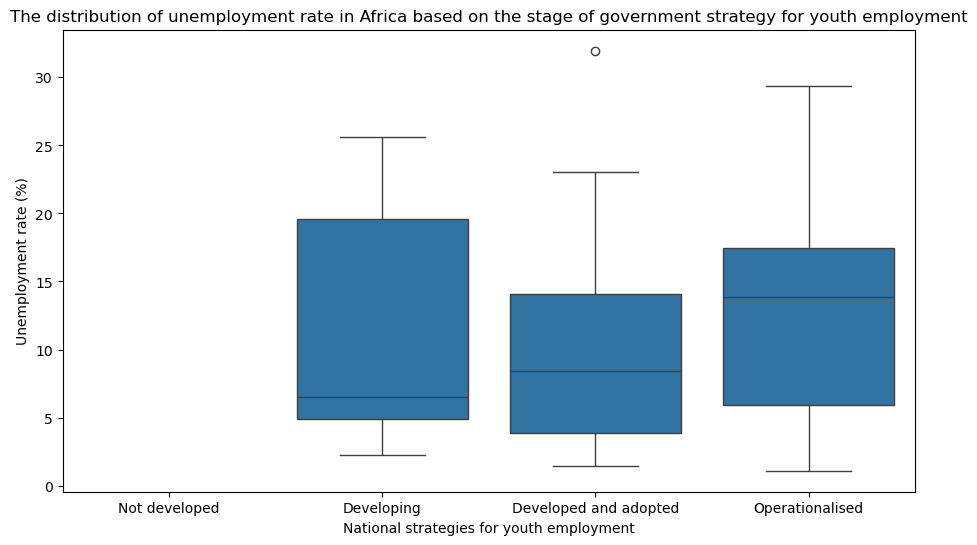

In [232]:
# Getting the data required for the box plot to show the effect of strategies on youth employment on unemloyment
box_plt_africa = merge_Africa[['average_unemployment','national_strategy_meaning','country', 'national_strategy']]

# Box plot
plt.figure(figsize=(11, 6))
sns.boxplot(x = box_plt_africa['national_strategy_meaning'], y = box_plt_africa['average_unemployment'],
            order = ['Not developed', 'Developing', 'Developed and adopted', 'Operationalised'])

plt.xlabel("National strategies for youth employment")
plt.ylabel ("Unemployment rate (%)")
plt.title ("The distribution of unemployment rate in Africa based on the stage of government strategy for youth employment");

African countries with strategies for youth employment were categorized from developing to operationalized, with the majority falling into the "Developing" category. There appears to be no clear relationship linking these strategies to unemployment rates.

Furthermore, because not all African countries in the unemployment dataset have information on national strategies for youth employment, it is challenging to draw definitive conclusions about their impact on unemployment.

### Country-specific analyses (Africa)

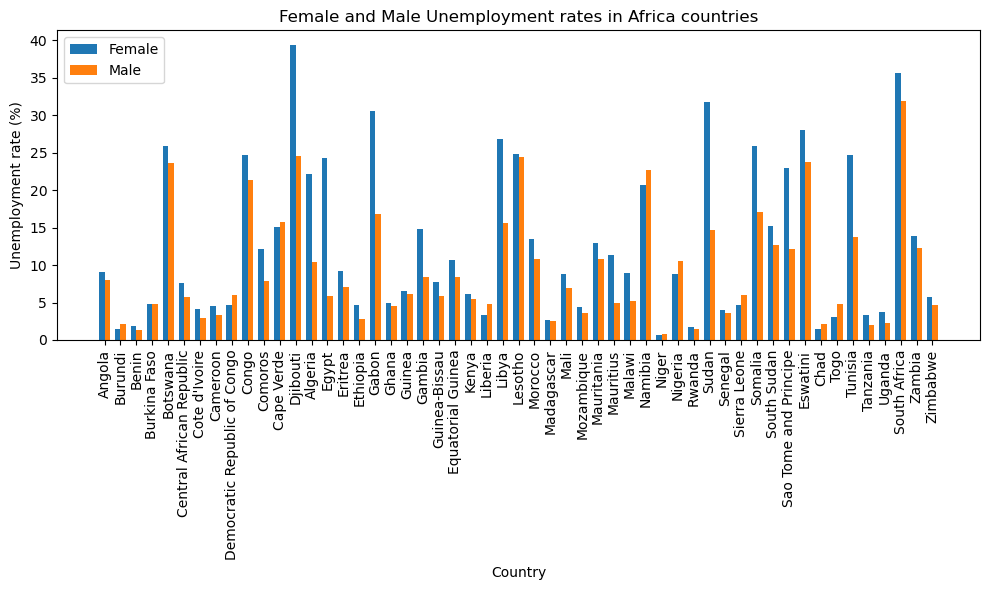

In [239]:
# Data for plotting
latest_merge_Africa = latest_unemployment_africa = merge_Africa[merge_Africa.year == 2021.0]
countries = latest_merge_Africa['country']
female_values = latest_merge_Africa['female']
male_values = latest_merge_Africa['male']

# Set bar width and positions
index = np.arange(len(countries))
bar_width = 0.35

# Plotting a clustered column chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, female_values, bar_width, label='Female')
bar2 = ax.bar(index + bar_width, male_values, bar_width, label='Male')

# Customize labels and layout
ax.set_xlabel('Country')
ax.set_ylabel('Unemployment rate (%)')
ax.set_title('Female and Male Unemployment rates in Africa countries')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(countries, rotation=90, ha='center')
ax.legend()
plt.tight_layout()
plt.show()

There is a significant discrepancy in unemployment rates between genders in Africa, with female unemployment rates consistently higher than those of males. This trend is particularly pronounced in several countries, including Djibouti, Gabon, Libya, Sudan, and Tunisia. According to the available data, only a few countries—namely Nigeria, Namibia, and Togo—reported higher male unemployment rates.

#### *Countries with the highest and lowest unemployment rates in Africa*

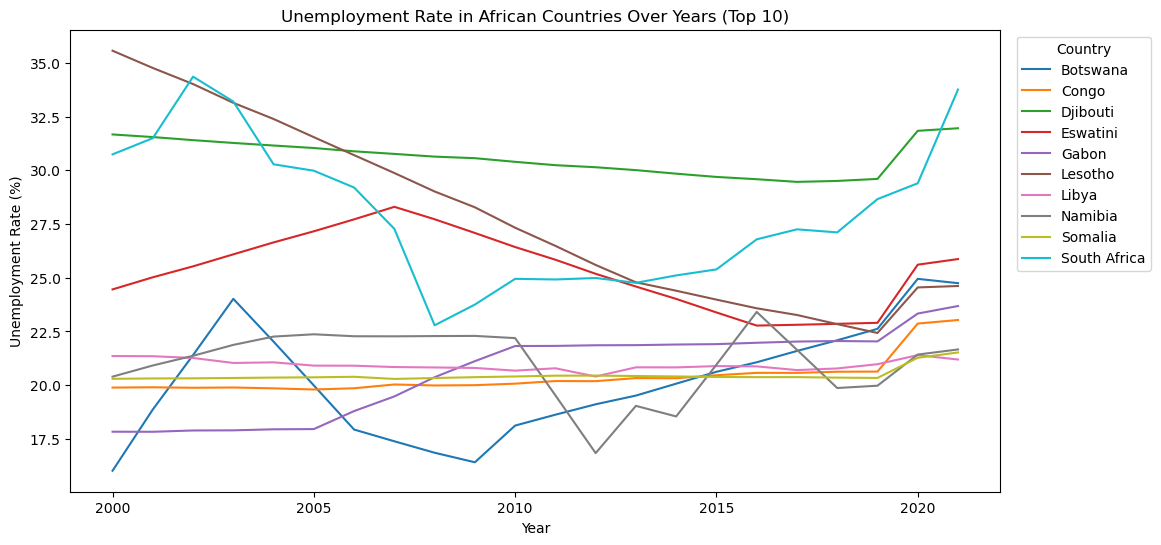

In [254]:
# Calculate mean unemployment for each country to get top 10 countries with the highest rates
top_10_countries = merge_Africa.groupby('country')['average_unemployment'].mean().nlargest(10).index

# Filter and reshape data for only the top 10 countries
top_10_data = (merge_Africa[merge_Africa['country'].isin(top_10_countries)]
              .groupby(['country', 'year'])['average_unemployment'].mean().reset_index())

# Plotting unemployment trends for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['average_unemployment'], label=country) for country, data in top_10_data.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in African Countries Over Years (Top 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

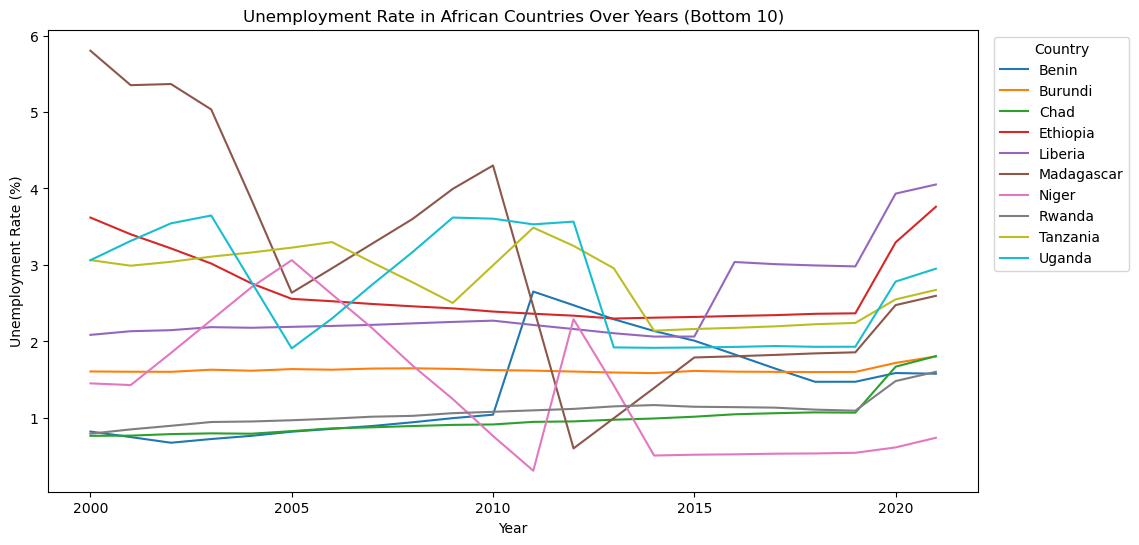

In [256]:
# Calculate mean unemployment for each country and get the 10 countries with the lowest unemployment rates
bottom_10_countries = merge_Africa.groupby('country')['average_unemployment'].mean().nsmallest(10).index

# Filter and reshape data for only the top 10 countries
bottom_10_data = (merge_Africa[merge_Africa['country'].isin(bottom_10_countries)]
              .groupby(['country', 'year'])['average_unemployment'].mean().reset_index())

# Plotting unemployment trends for bottom 10 countries using list comprehension
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['average_unemployment'], label=country) for country, data in bottom_10_data.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in African Countries Over Years (Bottom 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(False)
plt.show()

Given the nature of the relationships between these factors and unemployment, particularly with some not aligning with expected correlations, it was considered important to examine the highest and lowest-ranked African countries by unemployment to identify these patterns more closely, thereby providing actionable insights.

South Africa had the highest unemployment rate, followed by Djibouti and several other countries, including Eswatini, Botswana, and Lesotho. Notably, Lesotho recorded the highest unemployment rate among African countries in 2000, exceeding 35%, but has since decreased to below 25% in 2020.

On the other end, Rwanda, Madagascar, Ethiopia, Liberia, Niger, all recorded unemployment rates of less than 5%, signifying better performing countries.

Analyzing the relationships among various factors in both high and low unemployment-rated countries could offer valuable insights into the true effects of these factors on unemployment in Africa.

### *Filtering African countries for further evaluation*

In [261]:
print (f'10 African countries with the highest unemployment rates in Africa: {top_10_countries}')

10 African countries with the highest unemployment rates in Africa: Index(['Djibouti', 'South Africa', 'Lesotho', 'Eswatini', 'Namibia', 'Libya',
       'Gabon', 'Somalia', 'Congo', 'Botswana'],
      dtype='object', name='country')


In [263]:
print (f'10 African countries with the lowest unemployment rates in Africa: {bottom_10_countries}')

10 African countries with the lowest unemployment rates in Africa: Index(['Chad', 'Rwanda', 'Niger', 'Benin', 'Burundi', 'Liberia', 'Ethiopia',
       'Uganda', 'Tanzania', 'Madagascar'],
      dtype='object', name='country')


In [267]:
# Combine both lists to filter the DataFrame
african_countries = top_10_countries + bottom_10_countries

# Strip whitespace from country names in the DataFrame and the lists
merge_Africa.loc[:,'country'] = merge_Africa['country'].str.strip()
top_10_countries = [country.strip() for country in top_10_countries]
bottom_10_countries = [country.strip() for country in bottom_10_countries]

# Filter merge_Africa based on the country column
new = merge_Africa['country'].isin(african_countries)
filtered_africa_countries = merge_Africa[new]

# Display the filtered DataFrame
filtered_africa_countries.head(5)

# To confirm only 20 countries are present in the new dataset
filtered_africa_countries.country.nunique()

20

#### *Education*

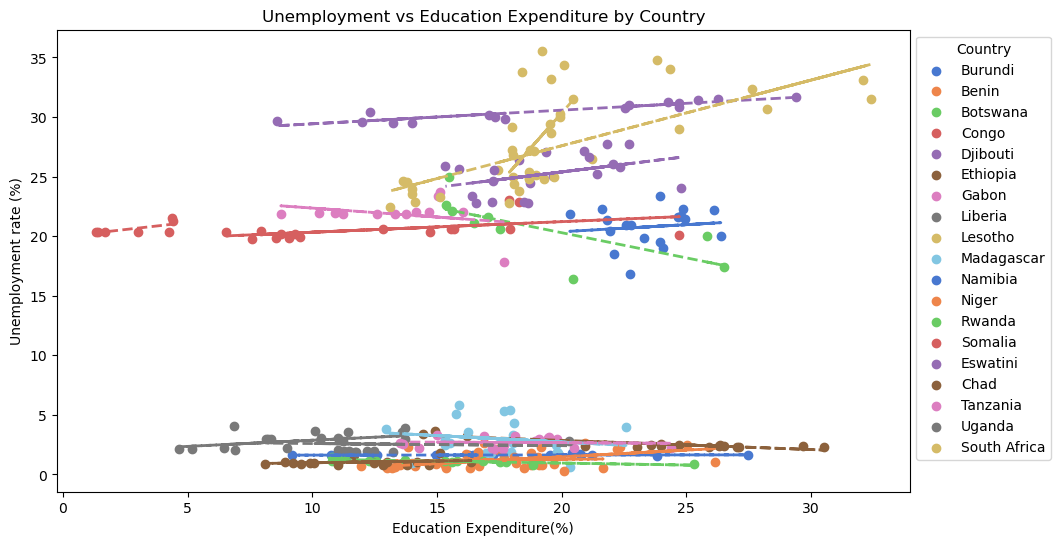

In [276]:
# Preparing the data
sc_fac_1 = filtered_africa_countries[['country','average_unemployment','education_expenditure']]
sc_fac_1 = sc_fac_1.dropna(subset=['education_expenditure', 'average_unemployment'])

# Choose a color palette
colors = sns.color_palette("muted", len(sc_fac_1['country'].unique()))


plt.figure(figsize=(11, 6))

# Loop through each unique country
unique_countries = sc_fac_1['country'].unique()
for i, country in enumerate(unique_countries):
    country_data = sc_fac_1[sc_fac_1['country'] == country]
    
    # Scatter plot for the current country
    plt.scatter(country_data['education_expenditure'], 
                country_data['average_unemployment'], 
                color=colors[i], 
                label=country)
    
    # Calculate the trendline for the current country
    z = np.polyfit(country_data['education_expenditure'], country_data['average_unemployment'], 1)
    p = np.poly1d(z)
    
    # Add trendline to the plot
    plt.plot(country_data['education_expenditure'], 
             p(country_data['education_expenditure']), 
             color=colors[i], 
             linestyle='--', 
             linewidth=2)

# Customize the plot
plt.ylabel("Unemployment rate (%)")
plt.xlabel("Education Expenditure(%)")
plt.title("Unemployment vs Education Expenditure by Country")
plt.legend(title='Country', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

As previously observed, increase in education expenditure did nothing to reduce unemployment rates in these countries.

#### *Electricity*

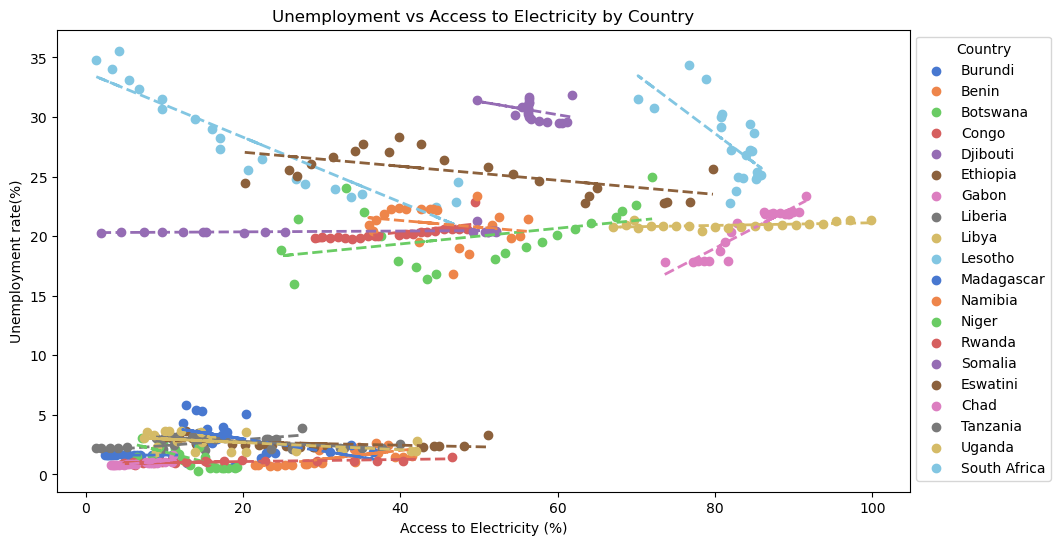

In [283]:
# Preparing the data
sc_fac_2 = filtered_africa_countries[['country','average_unemployment','electricity_access']]
sc_fac_2 = sc_fac_2.dropna(subset=['electricity_access', 'average_unemployment'])

# Choose a color palette
colors = sns.color_palette("muted", len(sc_fac_2['country'].unique()))


plt.figure(figsize=(11, 6))

# Loop through each unique country
unique_countries = sc_fac_2['country'].unique()
for i, country in enumerate(unique_countries):
    country_data = sc_fac_2[sc_fac_2['country'] == country]
    
    # Scatter plot for the current country
    plt.scatter(country_data['electricity_access'], 
                country_data['average_unemployment'], 
                color=colors[i], 
                label=country)
    
    # Calculate the trendline for the current country
    z = np.polyfit(country_data['electricity_access'], country_data['average_unemployment'], 1)
    p = np.poly1d(z)
    
    # Add trendline to the plot
    plt.plot(country_data['electricity_access'], 
             p(country_data['electricity_access']), 
             color=colors[i], 
             linestyle='--', 
             linewidth=2)

# Customize the plot
plt.ylabel("Unemployment rate(%)")
plt.xlabel("Access to Electricity (%)")
plt.title("Unemployment vs Access to Electricity by Country")
plt.legend(title='Country', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


Likewise, the increase in access to electricity did not correspond with a reduction in unemployment rates in these countries. Some African nations, such as Rwanda, Namibia, and Chad, which had less than 50% access to electricity, still managed to maintain unemployment rates below 5%.

However, analyzing the data points and trendlines for most countries suggests that even in those with high unemployment rates, there is a tendency for unemployment to decrease as access to electricity improves, particularly observed in Lesotho.

#### *Firms and business density rates*

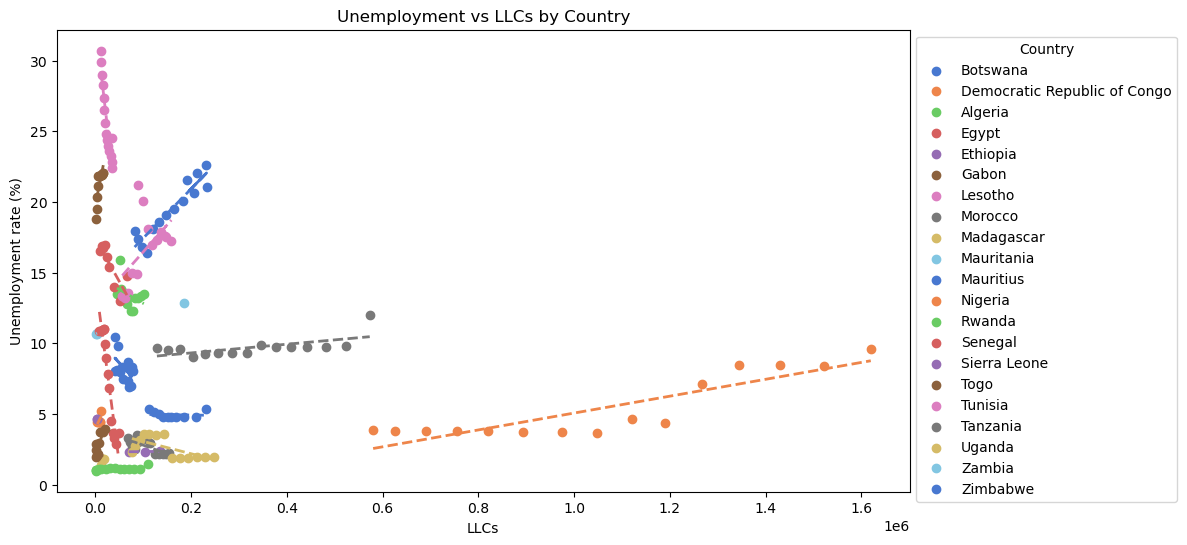

In [288]:
# Not all the filtered countries had values to get the scatter plot for LLCs and business_density_rate.
# All the African countries in the dataset were used instead
sc_fac_3 = merge_Africa[['country','average_unemployment','LLCs','business_density_rate']]

#Suppressing code warning that may result due to insufficient data points for trendline 
import warnings
warnings.simplefilter('ignore', np.RankWarning)

sc_fac_3 = sc_fac_3.dropna(subset=['LLCs', 'average_unemployment'])

# Choose a color palette
colors = sns.color_palette("muted", len(sc_fac_3['country'].unique())) 

plt.figure(figsize=(11, 6))
# Loop through each unique country
unique_countries = sc_fac_3['country'].unique()
for i, country in enumerate(unique_countries):
    country_data = sc_fac_3[sc_fac_3['country'] == country]
    
    # Scatter plot for the current country
    plt.scatter(country_data['LLCs'], 
                country_data['average_unemployment'], 
                color=colors[i], 
                label=country)
    
    # Calculate the trendline for the current country
    z = np.polyfit(country_data['LLCs'], country_data['average_unemployment'], 1)
    p = np.poly1d(z)
    
    # Add trendline to the plot
    plt.plot(country_data['LLCs'], 
             p(country_data['LLCs']), 
             color=colors[i], 
             linestyle='--', 
             linewidth=2)

# Customize the plot
plt.ylabel("Unemployment rate (%)")
plt.xlabel("LLCs")
plt.title("Unemployment vs LLCs by Country")
plt.legend(title='Country', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

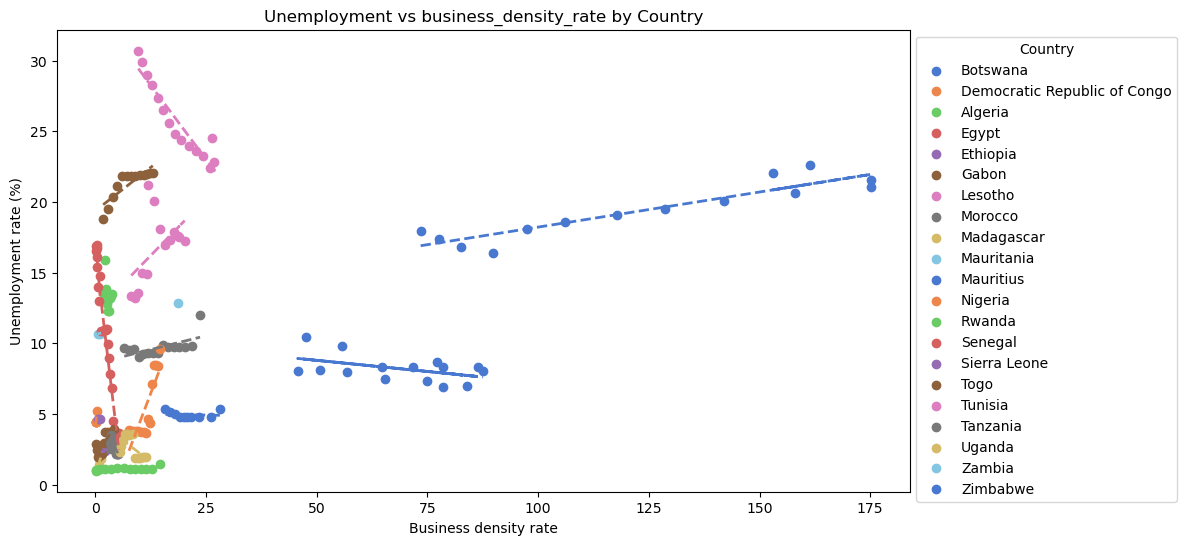

In [294]:
#Suppressing code warning that may result due to insufficient data points for trendline 
import warnings
warnings.simplefilter('ignore', np.RankWarning)

sc_fac_3 = sc_fac_3.dropna(subset=['business_density_rate', 'average_unemployment'])

# Choose a color palette
colors = sns.color_palette("muted", len(sc_fac_3['country'].unique()))

plt.figure(figsize=(11, 6))

# Loop through each unique country
unique_countries = sc_fac_3['country'].unique()
for i, country in enumerate(unique_countries):
    country_data = sc_fac_3[sc_fac_3['country'] == country]
    
    # Scatter plot for the current country
    plt.scatter(country_data['business_density_rate'], 
                country_data['average_unemployment'], 
                color=colors[i], 
                label=country)
    
    # Calculate the trendline for the current country
    z = np.polyfit(country_data['business_density_rate'], country_data['average_unemployment'], 1)
    p = np.poly1d(z)
    
    # Add trendline to the plot
    plt.plot(country_data['business_density_rate'], 
             p(country_data['business_density_rate']), 
             color=colors[i], 
             linestyle='--', 
             linewidth=2)

# Customize the plot
plt.ylabel("Unemployment rate (%)")
plt.xlabel('Business density rate')
plt.title("Unemployment vs business_density_rate by Country")
plt.legend(title='Country', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

New business formation as indiciated by LLCs and new density business rate was done for only a few African countries, as not all had informaiton on these in the dataset. 

However, based on the available information, it appears that most countries, regardless of their unemployment rates, have low business density rates. It seems that a substantial improvement in this metric could significantly influence unemployment in Africa. Notably, Botswana is an exception, as it experienced an increase in unemployment despite a significant improvement in its business density rate over the years. In contrast, several other countries saw reductions in unemployment rates with slight increases in business density.

A similar pattern can be observed with the number of new firms registered each year, as indicated by the LLC data. Most countries experienced a considerable drop in unemployment rates as the number of registered firms increased, even if only slightly. However, Nigeria and Tanzania did not follow this trend, as both saw an increase in unemployment despite rising LLC registrations.

### Recommendations

Taking a holistic approach by adapting some successful European practices could potentially reduce unemployment rates in Africa. While enhancing access to electricity and increasing government expenditure are helpful, fostering favorable conditions for business creation appears to be the most crucial factor in reducing unemployment. Additionally, implementing operational strategies specifically targeted at youth employment could significantly lower unemployment rates in African countries.

However, given the unique socio-economic dynamics in Africa, directly replicating the European model may not be entirely effective. Factors like electricity access do not affect unemployment as expected, suggesting that improvements in infrastructure alone may not necessarily encourage private business growth. For instance, greater access to electricity may not lead to a surge in entrepreneurship, as citizens may still prefer government jobs over starting businesses. Nevertheless, promoting a supportive business environment, with favorable policies and active strategies for youth employment, seems promising for reducing unemployment rates across African countries.

Ultimately, it’s essential for African countries to approach unemployment solutions individually, identifying patterns within their specific contexts and drawing on similarities with other regions only where relevant. Tailoring solutions to each country’s unique economic and social landscape will likely yield more effective results than a broader approach in combating unemployment. 

#### A summary of the report is attached in the github repository